C:\Users\Revathi Nanubala\AppData\Local\Temp\ipykernel_26648\2878480797.py:12: UserWarning: Parsing '18/06/1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_Of_Birth'] = pd.to_datetime(df['Date_Of_Birth'])
C:\Users\Revathi Nanubala\AppData\Local\Temp\ipykernel_26648\2878480797.py:12: UserWarning: Parsing '20/11/1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_Of_Birth'] = pd.to_datetime(df['Date_Of_Birth'])
C:\Users\Revathi Nanubala\AppData\Local\Temp\ipykernel_26648\2878480797.py:12: UserWarning: Parsing '15/06/1982' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date_Of_Birth'] = pd.to_datetime(df['Date_Of_Birth'])
C:\Users\Revathi Nanubala\AppData\Local\Temp\ipykernel_26648\2878480797.py:12: UserWarning: Parsing '27/03/1996' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=T

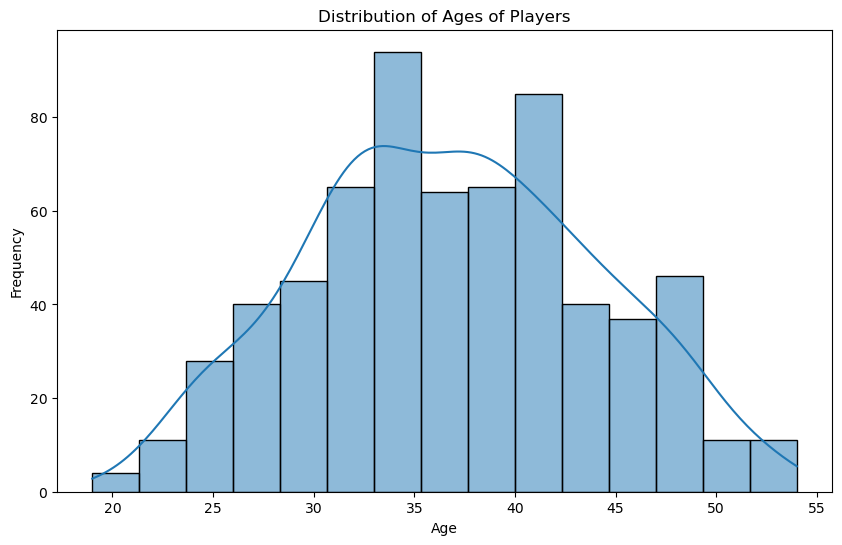

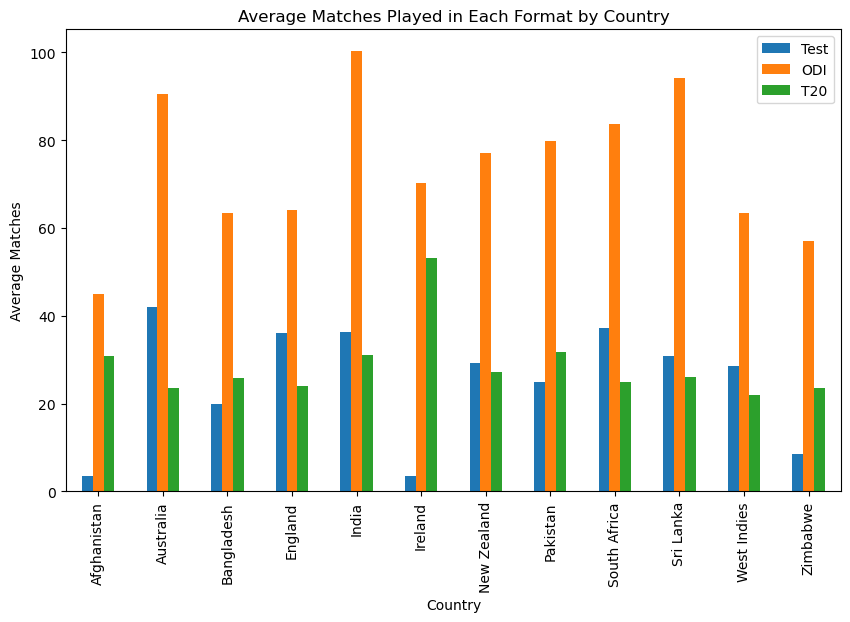

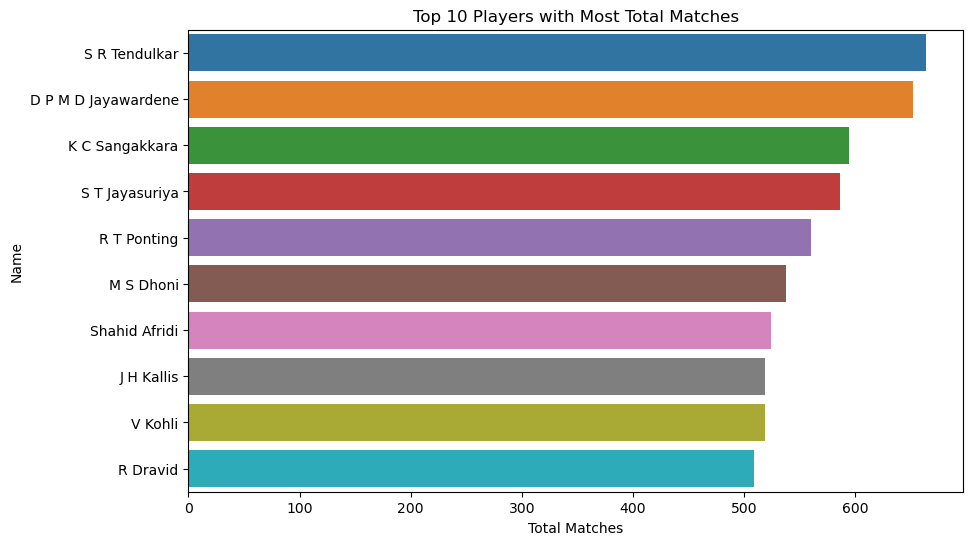

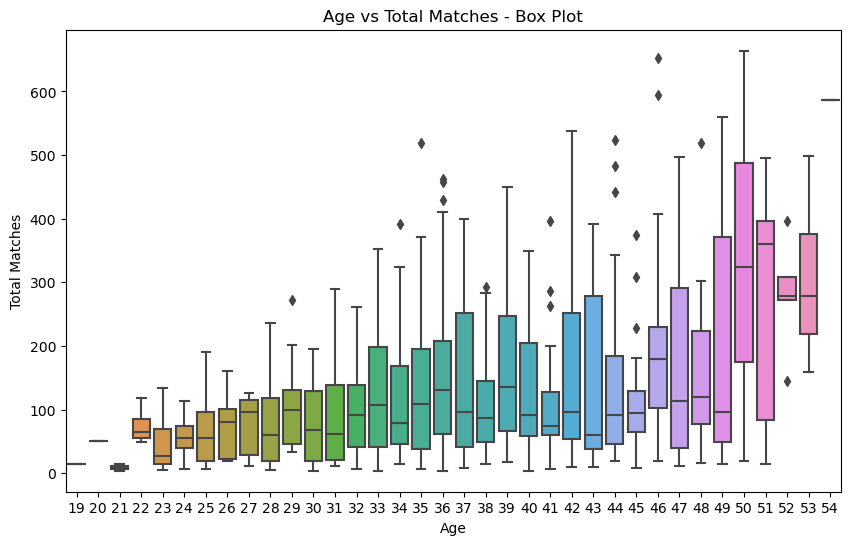

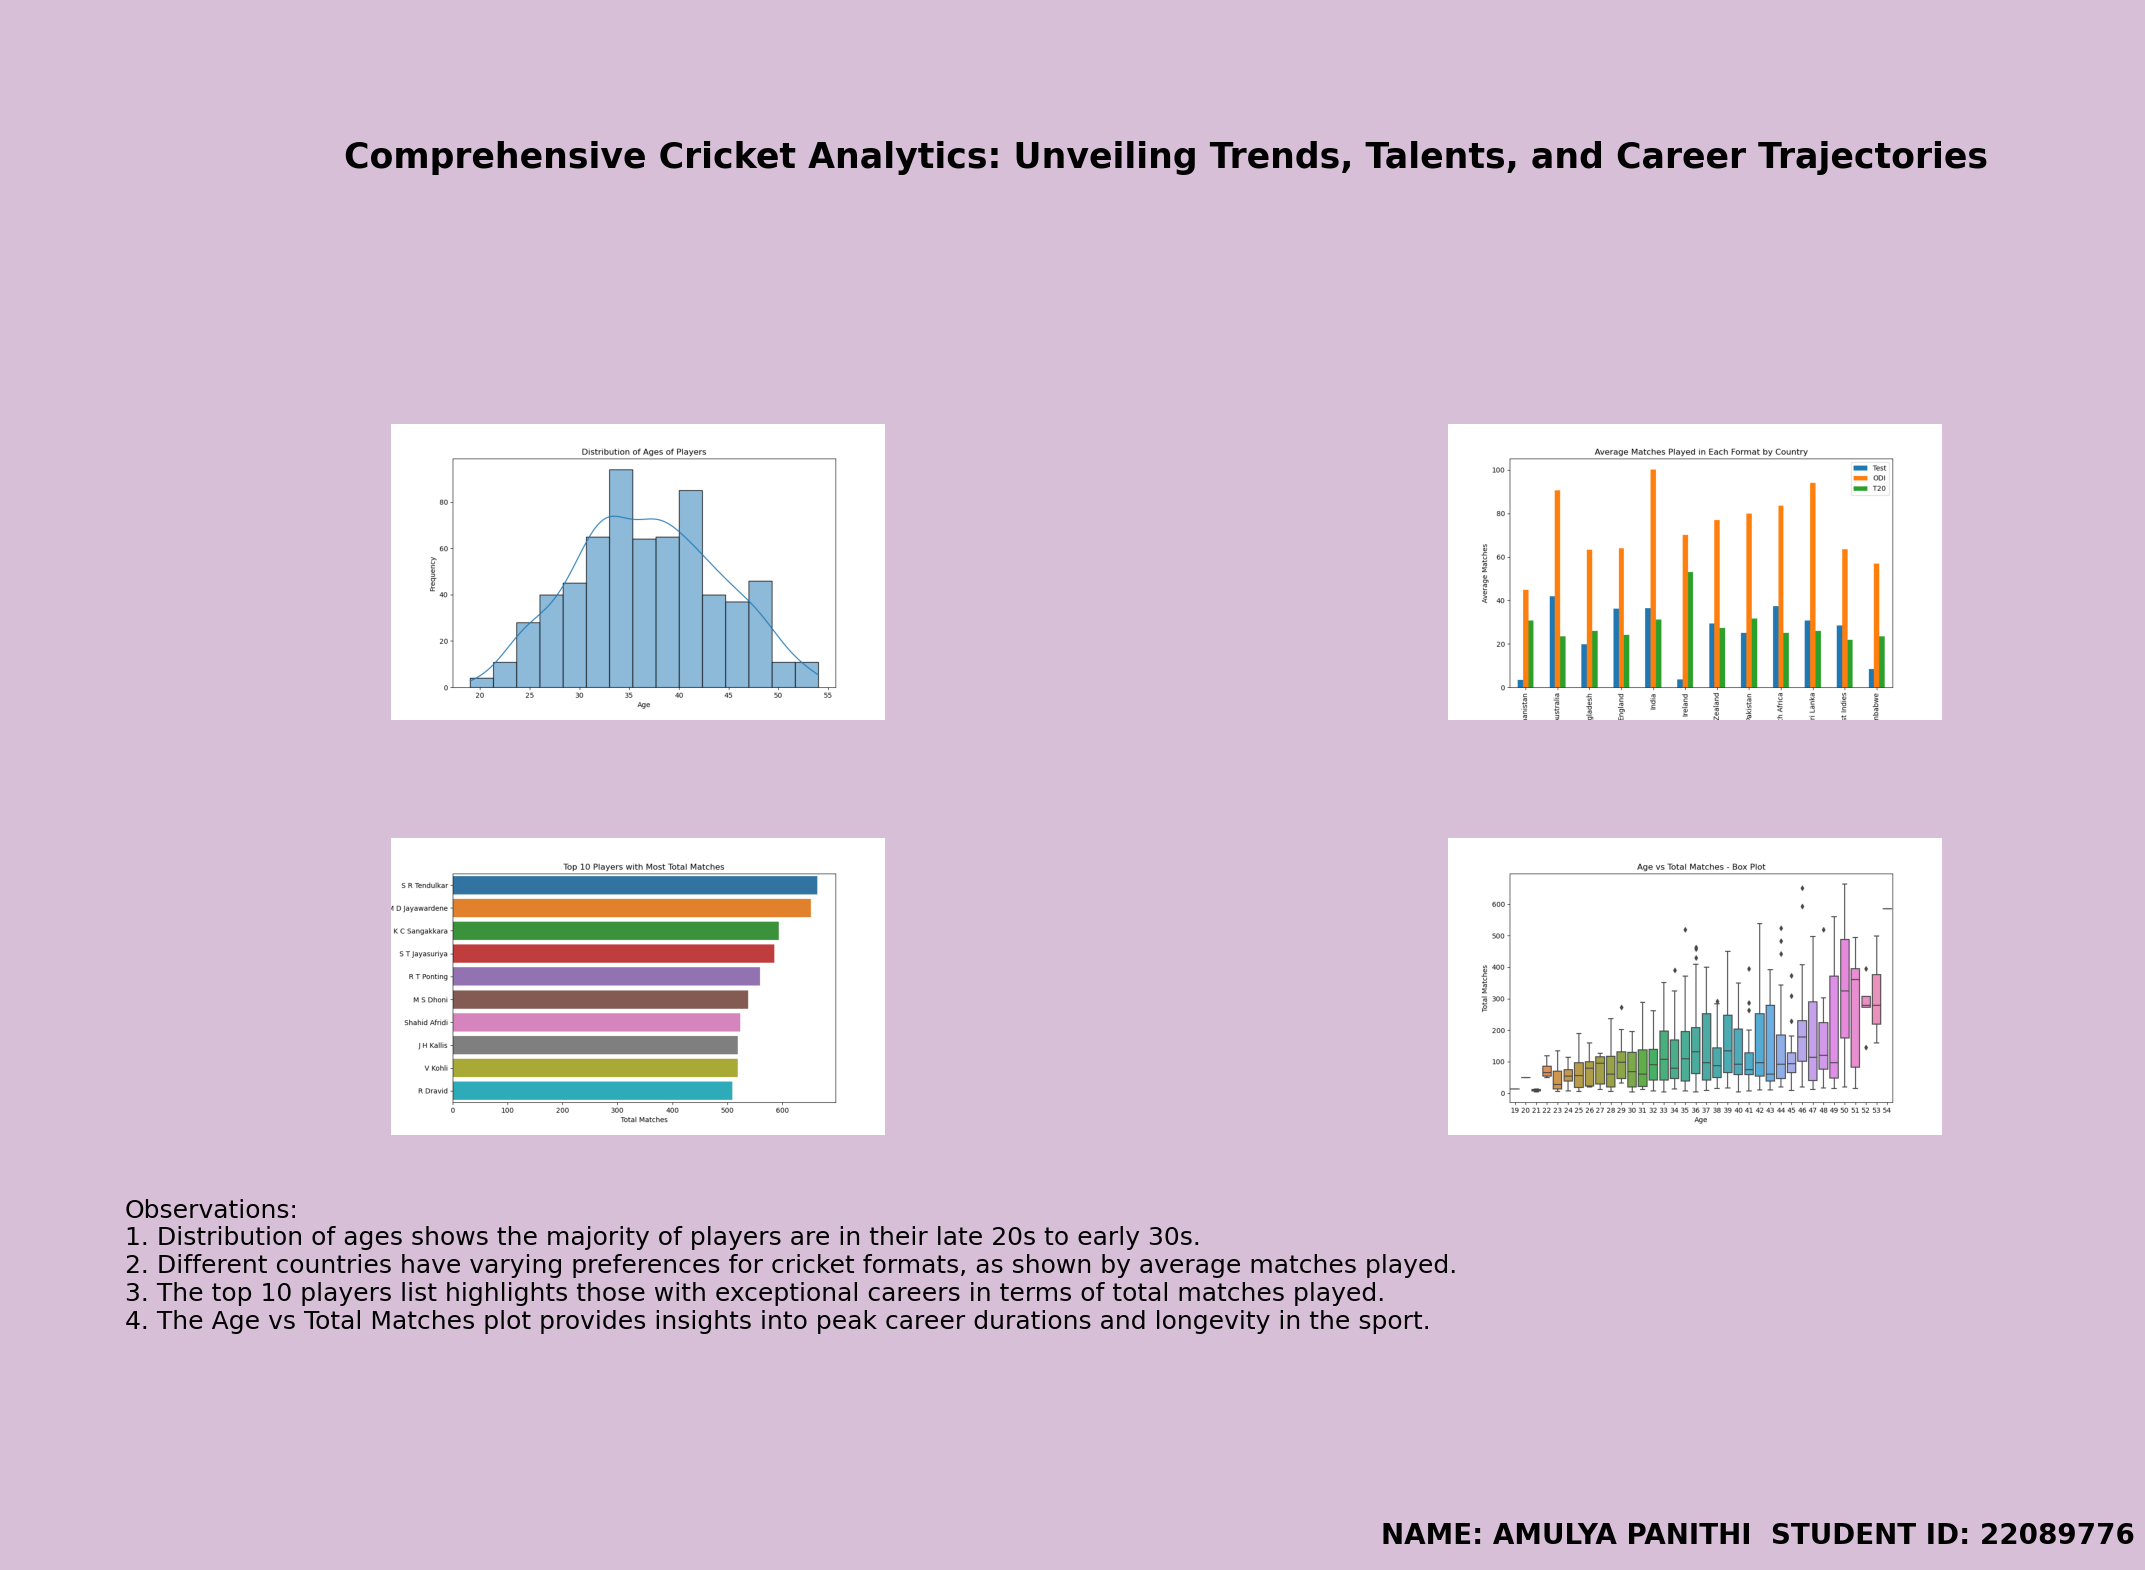

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Load and clean the data
df = pd.read_csv("cricketers.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(inplace=True)
df['Date_Of_Birth'] = pd.to_datetime(df['Date_Of_Birth'])
df['Age'] = (pd.Timestamp.now() - df['Date_Of_Birth']).dt.days // 365
df['Total_Matches'] = df['Test'] + df['ODI'] + df['T20']

# Visualization 1: Distribution of Ages of Players
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Distribution of Ages of Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')

# Visualization 2: Average Matches Played in Each Format by Country
avg_matches_by_country = df.groupby('Country')[['Test', 'ODI', 'T20']].mean()
avg_matches_by_country.plot(kind='bar', figsize=(10, 6))
plt.title('Average Matches Played in Each Format by Country')
plt.ylabel('Average Matches')
plt.savefig('avg_matches_by_country.png')

# Visualization 3: Top 10 Players with Most Total Matches
top_players = df.nlargest(10, 'Total_Matches')
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Matches', y='Name', data=top_players)
plt.title('Top 10 Players with Most Total Matches')
plt.xlabel('Total Matches')
plt.savefig('top_players.png')

# Visualization 4: Age vs Total Matches with Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Total_Matches', data=df)
plt.title('Age vs Total Matches - Box Plot')
plt.xlabel('Age')
plt.ylabel('Total Matches')
plt.savefig('age_vs_total_matches.png')

# Create a figure for the dashboard
plt.figure(figsize=(25, 20), facecolor='thistle')
grid = GridSpec(4, 2, hspace=0.4, wspace=0.2)

# Function to add plots to the dashboard
def add_plot_to_dashboard(position, filename):
    ax = plt.subplot(position)
    img = mpimg.imread(filename)
    ax.imshow(img)
    ax.axis('off')

# Add plots to the dashboard
add_plot_to_dashboard(grid[1, 0], 'age_distribution.png')
add_plot_to_dashboard(grid[1, 1], 'avg_matches_by_country.png')
add_plot_to_dashboard(grid[2, 0], 'top_players.png')
add_plot_to_dashboard(grid[2, 1], 'age_vs_total_matches.png')

# Add title to the top of the dashboard
ax_title = plt.subplot(grid[0, :])
ax_title.axis('off')
ax_title.text(0.5, 0.5, "Comprehensive Cricket Analytics: Unveiling Trends, Talents, and Career Trajectories", ha='center', va='center', fontsize=25, fontweight='bold', color='black')

# Add insights as labels
insights_text = """
Observations:
1. Distribution of ages shows the majority of players are in their late 20s to early 30s.
2. Different countries have varying preferences for cricket formats, as shown by average matches played.
3. The top 10 players list highlights those with exceptional careers in terms of total matches played.
4. The Age vs Total Matches plot provides insights into peak career durations and longevity in the sport.
"""
plt.annotate(insights_text, xy=(0.05, 0.2), xycoords='figure fraction', fontsize=18, ha='left', va='top', wrap=True)

# Add name and student ID in large block letters at the bottom right
ax_footer = plt.subplot(grid[3, :])
ax_footer.axis('off')
footer_text = "NAME: AMULYA PANITHI  STUDENT ID: 22089776"
ax_footer.text(1, 0, footer_text, ha='right', va='bottom', fontsize=20, fontweight='bold', transform=ax_footer.transAxes)

# Save the dashboard
plt.show()
